# Lecture 2

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy

In [2]:
FONTSIZE  = 18

$\frac{dS_1}{dt} = -(k_f +k_r)S_1 + k_r S_T$

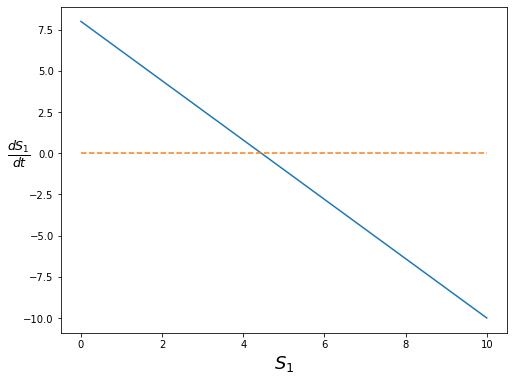

In [3]:
C_k_f = 1
C_k_r = 0.8
C_S_T = 10
values = np.array([0.1*v for v in range(0, 10*C_S_T+1)])
def ds(s):
     return np.array(-(C_k_f + C_k_r)*s + C_k_r*C_S_T)
fig, ax = plt.subplots(1, figsize=(8, 6))
ax.plot(values, ds(values))
ax.set_xlabel(r'$S_1$', fontsize=FONTSIZE)
ax.set_ylabel(r'$\frac{dS_1}{dt}$', fontsize=FONTSIZE, rotation=0)
_ = ax.plot([0, 10], [0, 0], linestyle="--")

$\frac{dS_1}{dt} = -(k_f +k_r)S_1(S_T - S_1) + k_r S_T = $

In [19]:
sy.init_printing()
dS1, S1, k_f, k_r, S_T, k_2, k_3, k_0, S2 = sy.symbols("dS1 S1 k_f k_r S_T k_2 k_3 k_0 S2")

In [10]:
f_dS1 = -(k_f + k_r)*S1*(S_T - S1) + (k_r)*S_T
sy.simplify(f_dS1)

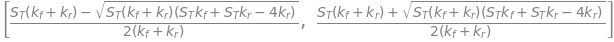

In [11]:
ans = sy.solve(f_dS1, S1)
ans

In [13]:
ans[0].evalf(subs={S_T: C_S_T, k_f: C_k_f, k_r: C_k_r})

## More Complicated Linear System
- $\emptyset \rightarrow S_1$; $k_0$
- $S_1 \leftrightarrow S_2$; $-k_f S_1 + k_r S_2$
- $S_1 \rightarrow 2 S_1$; $k_2 S_1$
- $S_2 \rightarrow \emptyset$; $k_3 S_2$

$\frac{S_1}{dt} = k_0 -k_f S_1 + k_r S_2 + k_2 S_1 = k_0 + S_1 (k_2 - k_f) + k_r S_2$

$\frac{S_2}{dt} = k_f S_1 - k_r S_2 - k_3 S_2 = k_f S_1 - S_2 (k_r + k_3)$



In [42]:
dS1 = k_0 + S1*(k_2 - k_f) + k_r*S2
dS2 = k_f*S1 - S2*(k_3 + k_r)

In [43]:
vMat = sy.Matrix([dS1, dS2])
vMat

⎡S₁⋅(k₂ - k_f) + S₂⋅kᵣ + k₀⎤
⎢                          ⎥
⎣  S₁⋅k_f - S₂⋅(k₃ + kᵣ)   ⎦

In [44]:
jacobian = vMat.jacobian((S1, S2))
jacobian

⎡k₂ - k_f     kᵣ   ⎤
⎢                  ⎥
⎣  k_f     -k₃ - kᵣ⎦

In [48]:
det = sy.simplify(jacobian.det())
det

Note that if $k_2 = 0$, then the determinant is always positive.

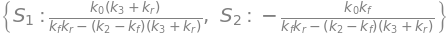

In [33]:
fixedPt = sy.solve([dS1, dS2], [S1, S2])
fixedPt

## Phase Portrait

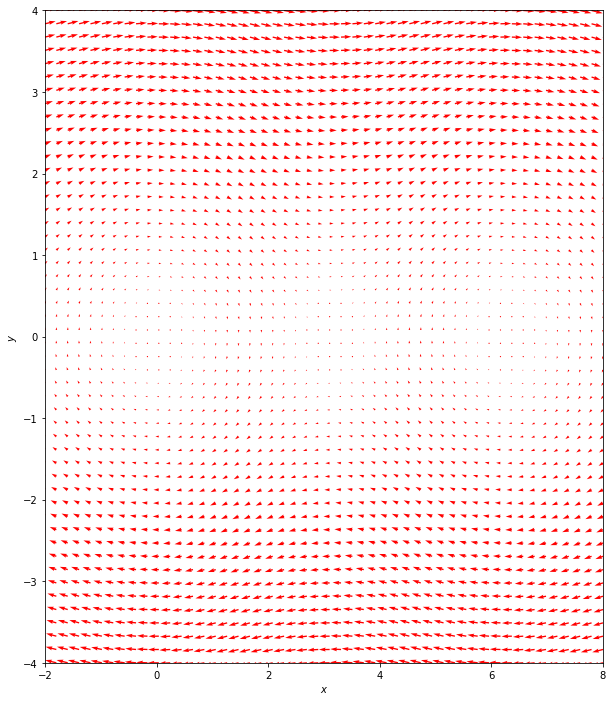

In [86]:
def plotPhase(xlim, ylim, dFunc, numPt=20):
    """
    Constructs a phase plot for a system of 2-d system of differential equations.

    Parameters
    ----------
    xlim: tuple
        lower and upper value of x
    ylim: tuple
        lower and upper value of y
    dFunc: Function
        args:
            tuple of current x, y
    numPt: int
        number of points in the grid
    """
    # Create the mesh
    xGrid = np.linspace(xlim[0], xlim[1], numPt)
    yGrid = np.linspace(ylim[0], ylim[1], numPt)
    xMesh, yMesh = np.meshgrid(xGrid, yGrid)
    xVals, yVals = np.zeros(xMesh.shape), np.zeros(yMesh.shape)
    # Populate mesh with values
    numX, numY = yMesh.shape
    for xIdx in range(numX):
        for yIdx in range(numY):
            x = xMesh[xIdx, yIdx]
            y = yMesh[xIdx, yIdx]
            yprime = dFunc([x, y])
            xVals[xIdx, yIdx] = yprime[0]
            yVals[xIdx, yIdx] = yprime[1]
    # Construct quiver plot
    fig, ax = plt.subplots(1, figsize=(10, 12))
    quiverPlt = ax.quiver(xMesh, yMesh, xVals, yVals, color='r')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
def dFunc(Y):
    y1, y2 = Y
    return [y2, -np.sin(y1)]
numPt = 50
xlim = [-2, 8]
ylim = [-4, 4]

plotPhase(xlim, ylim, dFunc, numPt=numPt)

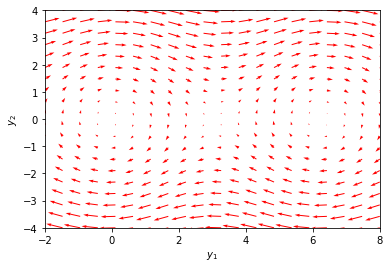

In [85]:
def f(Y, t):
    y1, y2 = Y
    return [y2, -np.sin(y1)]

y1 = np.linspace(-2.0, 8.0, 20)
y2 = np.linspace(-4.0, 4.0, 20)

Y1, Y2 = np.meshgrid(y1, y2)

t = 0

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

NI, NJ = Y1.shape

for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = f([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]
     

Q = plt.quiver(Y1, Y2, u, v, color='r')

plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.xlim([-2, 8])
plt.ylim([-4, 4])

## Nonlinear System

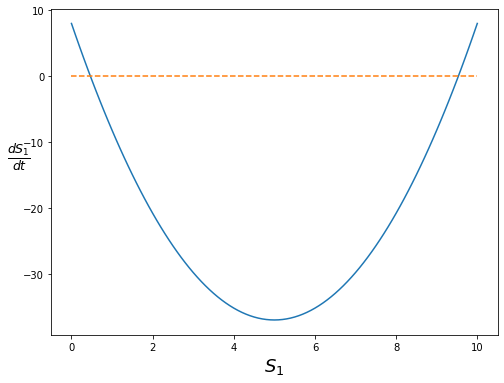

In [8]:
values = np.array([0.1*v for v in range(0, 10*C_S_T+1)])
def ds(s):
     return np.array(-(C_k_f + C_k_r)*s*(C_S_T-s) + C_k_r*C_S_T)
fig, ax = plt.subplots(1, figsize=(8, 6))
ax.plot(values, ds(values))
ax.set_xlabel(r'$S_1$', fontsize=FONTSIZE)
ax.set_ylabel(r'$\frac{dS_1}{dt}$', fontsize=FONTSIZE, rotation=0)
_ = ax.plot([0, 10], [0, 0], linestyle="--")